# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [More Analysis](#eda_continued)
- [Conclusions](#conclusions)
- [References](#References)


<a id='intro'></a>
## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, I will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. I will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. I will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, reader should start by asking questions he/she might want to understand about the bike share data.

For *the service provider* these questions might be interesting :
- Which docks on average serve the maximum and the minimum number of users?
- Which docks require the most maintenance?
- Are there any docks that run out of bikes? does this happen on certain days or hours?

For the service user these questions might be interesting :
- Docks-related questions: How many docks are there in the city and where they are? What is the average distance between one dock and another? Which stations are most popular? 


<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. The data has already been collected in the `data` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `data` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

In [1]:
## import all necessary packages and functions.
import csv                    # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint     # used to print data structures like dictionaries in
                              # a nicer way than the base print function.

In [2]:
def read_first_trip(DictReader):
    """
    This function only returns the first trip from
    the data file as an orderdict.
    """
    return DictReader.__next__()   # this is done through the next method 
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]  # this is to git only the city name (NYC, Chicago, Washington DC)
    print('\nCity: {}'.format(city))              # printing a string that contains the cleaned city name 
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)        # creating a DictReader object.       
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = read_first_trip(trip_reader) 
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)                       # pprint is used to help printing a dictionary in a nicely formatted way
     
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',   # a list that contains the data of the three cities 
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}                   # empty dictionary to save the city as a key and the data as the values 
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

Now we have the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

I will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, I will convert the Washington labels to match the other two.


In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    if(city == 'Washington'):                               # duration is measured in ms in Washington data
        duration = float(datum['Duration (ms)'])/60000      # dividing by 60000 to convert to minute 
    else:                                                   # in both Chicago and NYC duration is measured in second
        duration = float(datum['tripduration'])/60          # dividing by only a factor of 60
        
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
def get_date(trip):
    '''
    This function takes a string input in the format mm/dd/yyy hh:mm:ss and returns the
    month, day, year and the hour in int type.
    '''
    hour = trip.split(' ')[1].split(':')[0]      # this obtains a string that represents the hour a trip was made in
    trip = trip.split(' ')[0].split('/')         # the trip variable represents a list of strings that contain, month, day and 
    for i in range(len(trip)):                   # year respectively.
        trip[i] = int(trip[i])                   # this for loop is to convert the "date" list into integers instead of strings
    return trip, int(hour)                       # now this function returns "date" list alongside with the hour as integers
def format_date(date):
    '''
    This function helps to format the date as required (month(int), hour(int), day of the week (string))
    after using strftime function placed in the datetime module that returns the same format but as a single string
    '''
    date = date.split(" ")               # splitting the strings into three elements
    for i in range(0, len(date) - 1):    # looping over the first two elements (month, hour) and converting them into integers
        date[i] = int(date[i])
    return date[0], date[1], date[2]     # returning the required data 

def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    if(city == 'NYC' or city == 'Chicago'):
        date, hour = get_date(datum['starttime'])       # the key for starting date for these cities is the same
    else:
        date, hour = get_date(datum['Start date'])      # the key for starting date for the city of Washington is different
    date = datetime(date[-1], date[0] ,date[1], hour).strftime("%m %H %A")   # integers must be passed to it and it returns a 
    month, hour, day_of_week = format_date(date)                     # single string that contains month, hour and day of week.
    
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    if(city == 'Washington'):                         # Washington has a different key! also a differnet category names than
        if(datum['Member Type'] == 'Registered'):     # the other two cities.
            user_type = 'Subscriber'                  # making the user type consistent with the other two cities
        else:
            user_type = 'Customer'
            
    else:
        user_type = datum['usertype']
    
    return user_type                                  # returning the user type 


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

Now, using the helper functions written above I will create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']    # a list that contains the new keys      
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)              # writing the first row (header)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:               # looping over each row of the data file for each city
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}
            
            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point[out_colnames[0]] = duration_in_mins(row, city)        # assigning to every row the appropriate data
            new_point[out_colnames[1]], new_point[out_colnames[2]], new_point[out_colnames[3]] = time_of_trip(row, city)
            new_point[out_colnames[4]] = type_of_user(row, city)
            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)                                 # writing the row to the new csv file
            
            
            

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])



<a id='eda'></a>
## Exploratory Data Analysis

Now that we have the data collected and wrangled, we're ready to start exploring the data. In this section I will write some code to compute descriptive statistics from the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: The city that has the highest number of trips and the highest propotion of trips made by subscribers is *NYC*. Having a closer look and by refering to [NYC population](https://en.wikipedia.org/wiki/New_York_City), [Chicago population](https://en.wikipedia.org/wiki/Chicago). The populations are nearly found to be 8.5M and 2.7M respectively, so the results obtained makes sense because the results for NYC are around four times greater than for chicago **which is the same population ration**.  
The city that has the highest number of propotion of trips made by customers is *Chicago*.


In [8]:
def number_of_trips(filename, avg_time = False):
    """
    This function reads in a file with trip data and by default returns the number of
    trips made by subscribers, the ratio of trips made my subscribers and customers.
    If the avg_time was set to True, it returns the number and total duration of 
    trips made by both subscribers and customers to avoid code repetition later on.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0       # number of subscribers 
        time_subscribers = 0    # total duration subscribers use the service
        n_customers = 0         # number of customers
        time_customers = 0      # total duration customers use the service
        
        # tally up ride types
        for row in reader:                            # looping over rows in the new csv file
            if row['user_type'] == 'Subscriber':      # and counting on the number of subscribers and customers.
                n_subscribers += 1      
                if(avg_time):
                    time_subscribers += float(row['duration'])   # converting the duration from string to float
            else:
                n_customers += 1
                if(avg_time):
                    time_customers += float(row['duration'])     # again converting the duration recorded into the float type
                    
        
        # compute total number of rides
        n_total = n_subscribers + n_customers                    # total number of rides is the summation of both 
        
        # return tallies as a tuple
        if(avg_time):
            return(time_subscribers, time_customers, n_subscribers, n_customers)
        else:
            return(n_total, (n_subscribers/n_total)*100 , (n_customers/n_total)*100)   # ratio is caluclated - in general - as 
                                                                                       # (part/whole)*100 

In [9]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##
city_info = {'Washington': {'file_name': './data/Washington-2016-Summary.csv'},
             'Chicago': {'file_name': './data/Chicago-2016-Summary.csv'},
             'NYC': {'file_name': './data/NYC-2016-Summary.csv'}}
for city, filenames in city_info.items():
    print(city, number_of_trips(filenames['file_name'])[0], str(number_of_trips(filenames['file_name'])[1]) + ' %', str(number_of_trips(filenames['file_name'])[2]) + ' %')

Washington 66326 78.0282242257938 % 21.971775774206193 %
Chicago 72131 76.22520136973007 % 23.774798630269924 %
NYC 276798 88.83590199351151 % 11.164098006488485 %



**Question**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**:

| city| Washington | Chicago | NYC |
|---| --- | --- | --- |
|average | 19 | 16.56 | 15.8 |
| proportion | 10.8 % | 8.34 % | 7.31 % |


In [10]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##
def trip_duration(filename):
    '''
    This function takes as an input the whole data, and returns
    the average time of the trips made, also the ratio of trips
    above 30 mins.
    '''
    with open(filename, 'r') as f_in:
        trip_reader = csv.DictReader(f_in)
        n_rides_below = 0      # number of rides below five minutes
        n_rides_above = 0      # number of rides above five minutes
        total_time = 0         # total time
        for row in trip_reader:
            total_time += float(row['duration'])   # converting the string duration into float
            if(float(row['duration']) >= 30):  
                n_rides_above += 1                 # counting on the number of trips above and below 30 mins
            else:
                n_rides_below += 1
        n_rides = n_rides_above + n_rides_below    # total number of rides is the summation of both
        time_avg = total_time/n_rides              # average time is in general (total time divided by total number of rides)
        above_ratio = (n_rides_above/n_rides)*100  # ratio is caluclated - in general - as (part/whole)*100 
    return time_avg, above_ratio                   # returning the average time and the ratio of trips above 5 mins


In [11]:
city_info = {'Washington': {'file_name': './data/Washington-2016-Summary.csv'},
             'Chicago': {'file_name': './data/Chicago-2016-Summary.csv'},
             'NYC': {'file_name': './data/NYC-2016-Summary.csv'}}
for city, filenames in city_info.items():
    print(city, trip_duration(filenames['file_name'])[0], str(trip_duration(filenames['file_name'])[1]) + ' %')

Washington 18.93287355913721 10.83888671109369 %
Chicago 16.563629368787335 8.34731252859381 %
NYC 15.81259299802294 7.316888127804392 %


**Question**: Digging deeper into the question of trip duration based on ridership and choosing one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: 

| city| Washington | Chicago | NYC |
|---| --- | --- | --- |
|subscribers average | 12.52 | 12 | 13.68 |
| customers average | 41.67 | 31 | 32.77 |


Just to make sure that the results are closely related, I tested all the data not only one city data. Each of the three cities has a customer average time that is three times greater than the subscribers average time! so the data collected for *the Bay Area* has almost twice the level of difference compared to these three cities.

In [12]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference? ##
def avg_time(filename):
    '''
    This function calculates the average time for both 
    subscribers and customers individually with the help of a predefined function (number_of_trips)
    '''
    time_subscribers, time_customers, n_subscribers, n_customers = number_of_trips(filename, True)  # calling the number of trips
    return (time_subscribers/n_subscribers), (time_customers/n_customers)                           # function and setting the 
                                                                                                    # argument to True.


In [13]:
city_info = {'Washington': {'file_name': './data/Washington-2016-Summary.csv'},
             'Chicago': {'file_name': './data/Chicago-2016-Summary.csv'},
             'NYC': {'file_name': './data/NYC-2016-Summary.csv'}}
for city, filenames in city_info.items():
    print(city, avg_time(filenames['file_name']))

Washington (12.528120499294745, 41.67803139252976)
Chicago (12.067201690250076, 30.979781133982506)
NYC (13.680790523907177, 32.77595139473187)


<a id='visualizations'></a>
### Visualizations

The last set of values that I computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. 
The cell below loads the *Matplotlb* library and generates an example plot tp introduce you to the functionality of the libirary.

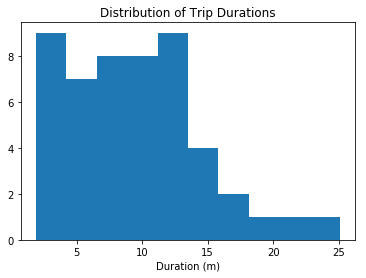

In [14]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.


In [15]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
def plot_triptime(filename):
    '''
    This function plots the duration of the trips for a certain 
    data in histograms.
    '''
    time_list = []
    with open(filename, 'r') as f_in:
        trip_reader = csv.DictReader(f_in)   # setting up a DictReader object.
        for row in trip_reader:              # looping over rows in the newly created csv file
            time_list.append(float(row['duration']))   # appending trip duration in an empty list after converting it into float
        plt.hist(time_list)                            # plotting a histogram for the duration list
        plt.title('Distribution of Trip Durations')
        plt.xlabel('Duration (m)')
        plt.show()

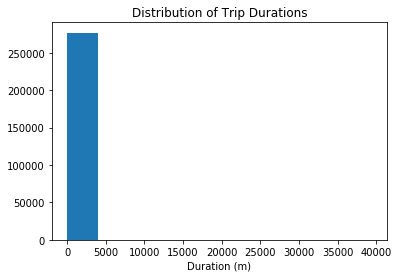

In [16]:
file_name = './data/NYC-2016-Summary.csv'  
plot_triptime(file_name)        # calling the plot function on the NYC data file

Now you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, I will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: 

| Group| Subscribers | Customer |
|---| --- | --- |
|peak | 5 - 10 | 15 - 25 | 

For the *subscribers*, the shape has a mean larger than the median since the shape is right skewed. Even if the shape of the *customers* can be nearly considered also as a right skewed shape, if we considered the trips greater than 50 mins as outliers, a strange observation comes in presence! the shape is almost a normal distribution with a mean equal to median.
This is proven through the code below.



In [36]:
## Use this and additional cells to answer Question 5. ##
def create_binsize(minimum, maximum, width):
    '''
    A function to create a certain binsize!
    '''
    bins = []   # an empty list to store the bin sizes
    for i in range(minimum, maximum + 1 , width): # looping starting with minimum and ending at maximum with a step equa to width
        bins.append(i)                            # appending in the bins list
        if(i + width > maximum and maximum - i > 0):  # handling the case where the next step will exceed maximum, so the last
            bins.append(maximum)                      # bin must be of a different size (less than its predecessors)! 
            
    return bins
def plot_triptime(filename,lower_range = 0, upper_range = 75, minimum = 0, maximum = 75, width = 5):
    '''
    This function plots the trips duration in histogram, with some optional defaultly setted 
    parameters, lower and upper range of the data passed,
    minimum, maximum and the width of the histogram bins.
    Note that they are all setted to values that satisfies this specific question.
    Also it returns two lists that contain the trips duration for both subscribers and customers for later usage.
    ''' 
    sub_time_list = []         # two empty lists to sotre the trip duration for both subscribers 
    cus_time_list = []         # and customers
    with open(filename, 'r') as f_in:  
        trip_reader = csv.DictReader(f_in)
        for row in trip_reader:                      # looping over the newly created csv file 
            if(row['user_type'] == 'Subscriber'):    # conditional statement to decide whether a user i subscriber or customer
                sub_time_list.append(float(row['duration']))      # converting the duration into float instead of string
            else:
                cus_time_list.append(float(row['duration']))      # again converting the duration into the float type
        # plotting both histograms for subscribers and customers
        plt.hist(sub_time_list, range = [lower_range,lower_range], bins = create_binsize(minimum, maximum, width))
        plt.hist(cus_time_list, range = [lower_range,upper_range], bins = create_binsize(minimum, maximum, width))

        plt.title('Distribution of Trip Durations')
        plt.xlabel('Duration (m)')
        plt.show()
        return sub_time_list, cus_time_list

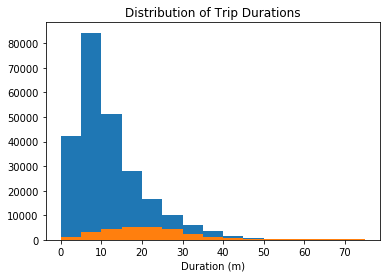

(13.680790523907177, 32.77595139473187)
9.716666666666667
20.63163742484438
21.2


In [37]:
from statistics import median         # to calculate median
def mean(numbers):
    '''
    This function calculates the mean of a given list.
    '''
    return float(sum(numbers)) / max(len(numbers), 1)    
file_name = './data/NYC-2016-Summary.csv'
sub_time_list, cus_time_list = plot_triptime(file_name)  # plotting the histograms 
print(avg_time(file_name))                               # printing averages before cutting the data
print(median(sub_time_list))                             # calculate the subscribers trips duration median                 
new_cus_time_list = []                                   # a new customers list to store trips duration lowe than 50
for i in range(len(cus_time_list)):
    if cus_time_list[i] < 50:
        new_cus_time_list.append(cus_time_list[i])
print(mean(new_cus_time_list))                           # calculate the new mean 
print(median(cus_time_list))                             # calculate the new median

<a id='eda_continued'></a>
## More Analysis

**Question 5**: What is the relation between user type and the day of the week? do subscribers or customers use the service within wake days more than weekends or vice versa? 
Also, what is the relation between user type and the hour of the day? do subscribers and customers use the service more oftenly during morning hours or night hours?

**Answer**: Subscribers appear to use the service within week days more than weekends! 
Surprisingly, it's the opposite situation in the case of customers!
Also subscribers appear to be using the service from 00:00 to 11:59 AM more than from 12:00 to 23:59 PM, which is surprisingly the opposite case for the customers! 

In [38]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##
def users_through_week(filename):
    '''
    This function calculates the number of subscribers and customers through the week. 
    Also calculates how many users use the service from 0 - 11:59 AM and from 12 - 23:59 PM 
    for both subscribers and customers.
    '''
    sub_users = [0, 0, 0, 0, 0, 0, 0]   # The week starts at monday and ends at sunday
    cus_users = [0, 0, 0, 0, 0, 0, 0] 
    sub_night_users = 0
    sub_mor_users = 0
    cus_night_users = 0
    cus_mor_users = 0
    with open(filename, 'r') as f_in:
        trip_reader = csv.DictReader(f_in)
        for row in trip_reader:        # looping over the newly created csv file 
                if(row['user_type'] == 'Subscriber'):  # checking whether the use is a subscriber or a customer
                    if(int(row['hour']) < 12):         # checkin' on the hour and counting up users after converting 
                        sub_mor_users += 1             # the value from string into int
                    else:
                        sub_night_users += 1
                else:                                  # if the user is a customer the same procedure 
                    if(int(row['hour']) < 12):         
                        cus_mor_users += 1 
                    else:
                        cus_night_users += 1
                if(row['day_of_week'] == 'Monday'):        # conditional statements for counting on the number of subscribers
                    if(row['user_type'] == 'Subscriber'):  # and customers that usethe service in each day of the week.
                        sub_users[0] += 1
                    else:
                        cus_users[0] += 1
                elif(row['day_of_week'] == 'Tuesday'):
                    if(row['user_type'] == 'Subscriber'):
                        sub_users[1] += 1
                    else:
                        cus_users[1] += 1
                elif(row['day_of_week'] == 'Wednesday'):
                    if(row['user_type'] == 'Subscriber'):
                        sub_users[2] += 1
                    else:
                        cus_users[2] += 1
                elif(row['day_of_week'] == 'Thursday'):
                    if(row['user_type'] == 'Subscriber'):
                        sub_users[3] += 1
                    else:
                        cus_users[3] += 1
                elif(row['day_of_week'] == 'Friday'):
                    if(row['user_type'] == 'Subscriber'):
                        sub_users[4] += 1
                    else:
                        cus_users[4] += 1
                elif(row['day_of_week'] == 'Saturday'):
                    if(row['user_type'] == 'Subscriber'):
                        sub_users[5] += 1
                    else:
                        cus_users[5] += 1
                elif(row['day_of_week'] == 'Sunday'):
                    if(row['user_type'] == 'Subscriber'):
                        sub_users[6] += 1
                    else:
                        cus_users[6] += 1
    return sub_users, cus_users, sub_night_users, sub_mor_users, cus_night_users, cus_mor_users
                

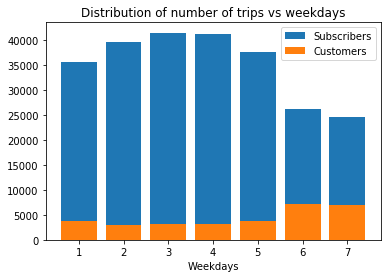

161254 84642 6723 24179


In [40]:
file_name = './data/NYC-2016-Summary.csv'
sub_users, cus_users, sub_night_users, sub_mor_users, cus_night_users, cus_mor_users = users_through_week(file_name)
p1 = plt.bar(['1', '2', '3', '4', '5', '6', '7'], sub_users)             # plotting results in a bar plot
p2 = plt.bar(['1', '2', '3', '4', '5', '6', '7'], cus_users)             # 1 = monday, 2= thursday and so on .. 
plt.title('Distribution of number of trips vs weekdays')
plt.xlabel('Weekdays')
plt.legend((p1[0], p2[0]), ('Subscribers', 'Customers'))                # adding legends to the figure 
plt.show()
print(sub_night_users, sub_mor_users, cus_mor_users, cus_night_users)

<a id='conclusions'></a>
## Conclusions

This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

<a id='conclusions'></a>
## References 
Listed below the references i used within this project:
- [An example on how to use *strftime* method](https://www.programiz.com/python-programming/library/strftime)
- [How to use the *datetime* module](https://docs.python.org/3/library/datetime.html#datetime.datetime)
- [*Tables* in markdown](https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter)
- [Calculating *mean* using python in the most effective way](https://stackoverflow.com/questions/7716331/calculating-arithmetic-mean-one-type-of-average-in-python)